In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import urllib.request
import os
import collections
import asyncio
import xlsxwriter
from csv import DictWriter
%matplotlib inline

In [2]:
def get_image(url):
    # image = cv2.imread(img)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    imageRGB = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    return imageRGB

In [3]:
def center_crop(img, dim):
	height, width = img.shape[0], img.shape[1]
    # process crop width and height for max available dimension
	# crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1] # check width
	# crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] # check height
	mid_x, mid_y = int(width/2), int(height/2)
    # cw2, ch2 = int(crop_width/2), int(crop_height/2) # crop x,y stable
	crop_img = img[mid_y-dim[0]:mid_y+dim[1], mid_x-dim[2]:mid_x+dim[3]]
	return crop_img

downloading : http://tiwrmdev.hii.or.th/ContourImg/2021/09/10/hatempY2021M09D10T05.png => success!!


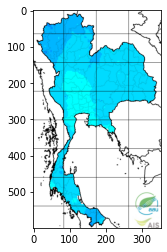

In [7]:
url_img = "http://tiwrmdev.hii.or.th/ContourImg/2021/09/10/hatempY2021M09D10T05.png"
print("downloading : %s => success!!" % url_img)
image = get_image(url_img)
modi_img = center_crop(image, (330, 270,165,186))
plt.imshow(modi_img)
plt.show()

In [12]:
def create_xlsx_file(file_path: str, headers: dict, items: list):
    with xlsxwriter.Workbook(file_path) as workbook:
        worksheet = workbook.add_worksheet()
        worksheet.write_row(row=0, col=0, data=headers.values())
        header_keys = list(headers.keys())
        for index, item in enumerate(items):
            row = map(lambda field_id: item.get(field_id, ''), header_keys)
            worksheet.write_row(row=index + 1, col=0, data=row)
headers = {
    'bank': 'Money in Bank',
    'dailyWinners': 'Daily Winners',
    'dailyFree': 'Daily Free',
    'user': 'User',
}

players = [
    {'dailyWinners': 3, 'dailyFreePlayed': 2, 'user': 'Player1', 'bank': 0.06},{'dailyWinners': 50},
    {'dailyWinners': 3, 'dailyFreePlayed': 2, 'user': 'Player2', 'bank': 4.0},
    {'dailyWinners': 1, 'dailyFree': 2, 'user': 'Player3', 'bank': 3.1},
    {'dailyWinners': 3, 'dailyFree': 2, 'user': 'Player4', 'bank': 0.32}
]

create_xlsx_file("my_xslx_file.xlsx", headers, players)